# Evolutionary Data Analysis of Dinosaur Characteristics

By Elsie Wang

Purpose: Perfom data analysis of most advantageous dinosaur characteristics in evolution by time period

Date: 04/06/24

In [81]:
# Import statements
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [82]:
# Import datasets
jurassic = pd.read_csv('../data/jurassic_park.csv')
jurassic.head()

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...


## Data Cleaning

In [83]:
def extract_duration(row):
    """Takes period text and returns the time span"""
    pattern = r'(\d+)-(\d+)'
    match = re.search(pattern, row)
    if match:
        start_year = int(match.group(1))
        end_year = int(match.group(2))
        return np.abs(end_year - start_year)
    else:
        return None

In [84]:
# Create column extract time period
pattern = r'^\w+\s+(\w+)'
jurassic['time_period'] = jurassic['period'].str.extract(pattern)

# Create column extract time span
jurassic['time_span'] = jurassic['period'].apply(extract_duration)

# Make length numeric value
jurassic['length'] = pd.to_numeric(jurassic['length'].str.rstrip('m'))

# Drop NaN values
jurassic_cleaned = jurassic.dropna()
jurassic_cleaned

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,time_period,time_span
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,10.0
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,4.0
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,13.0
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,15.0
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
301,yimenosaurus,herbivorous,Early Jurassic 195-190 million years ago,China,sauropod,9.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Bai Yang and Wang (1990),youngi,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,5.0
303,yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,5.0
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,21.0
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,15.0


In [85]:
# Create column to group countries by continent
countries_continents = { 'Argentina': 'South America', 
                        'Australia': 'Australia', 
                        'Brazil': 'South America', 
                        'Canada': 'North America', 
                        'China': 'Asia', 
                        'Egypt': 'Africa', 
                        'France': 'Europe', 
                        'Germany': 'Europe', 
                        'India': 'Asia', 
                        'Japan': 'Asia', 
                        'Kazakhstan': 'Asia', 
                        'Lesotho': 'Africa', 
                        'Madagascar': 'Africa', 
                        'Malawi': 'Africa', 
                        'Mongolia': 'Asia', 
                        'Morocco': 'Africa', 
                        'Niger': 'Africa', 
                        'North Africa': 'Africa', 
                        'Romania': 'Europe', 
                        'Russia': 'Asia', 
                        'South Africa': 'Africa', 
                        'Spain': 'Europe', 
                        'Tanzania': 'Africa', 
                        'Tunisia': 'Africa', 
                        'USA': 'North America', 
                        'United Kingdom': 'Europe', 
                        'Uruguay': 'South America', 
                        'Uzbekistan': 'Asia', 
                        'Zimbabwe': 'Africa' } 

jurassic_cleaned['continent'] = jurassic_cleaned['lived_in'].replace(countries_continents)
jurassic_cleaned.head()

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,time_period,time_span,continent
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,10.0,Africa
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,4.0,South America
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,13.0,North America
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,15.0,Asia
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,10.0,North America


Additional species info 

**Armoured dinosaurs**

Medium-sized, four-legged herbivores with body armour, sometimes including tail spikes.

**Ceratopsians**

Herbivores with parrot-like beaks, bony frills and in many cases horns.

**Euornithopod**
two-legs

**Large Theropod**

Large carnivores that walked on two legs.

**Small Theropod**

Small carnivores, herbivores and omnivores that walked on two legs and often had feathers. Birds are part of this group.

**Sauropod**

Very large herbivores that walked on four legs and had long necks, small heads and long tails.

In [86]:
# Add more phenotypical traits by type (source: National History Museum)
species_pedal = {'armoured dinosaur': 2, 
                 'ceratopsian': 4, 
                 'euornithopod': 2, 
                 'large theropod': 2, 
                 'sauropod': 4, 
                 'small theropod': 2}

jurassic_cleaned['legs'] = jurassic_cleaned['type'].replace(species_pedal)

In [87]:
# Upload cleaned dataset to csv
#jurassic_cleaned.to_csv('../data/jurassic_clean.csv', index=False)

In [88]:
jurassic_cleaned.groupby('type').count()

,name,diet,period,lived_in,length,taxonomy,named_by,species,link,time_period,time_span,continent,legs
type,,,,,,,,,,,,,
armoured dinosaur,26,26,26,26,26,26,26,26,26,26,26,26,26
ceratopsian,21,21,21,21,21,21,21,21,21,21,21,21,21
euornithopod,48,48,48,48,48,48,48,48,48,48,48,48,48
large theropod,52,52,52,52,52,52,52,52,52,52,52,52,52
sauropod,59,59,59,59,59,59,59,59,59,59,59,59,59
small theropod,52,52,52,52,52,52,52,52,52,52,52,52,52


## Exploratory Data Analysis

In [89]:
def generate_plots_period(df):
    """Return list of plots comparing timespan and feature variables for each period"""

    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot the bar plot for average time lived by diet
    average_time_lived_diet = df.groupby('diet')['time_span'].mean().reset_index()
    sns.barplot(x='diet', y='time_span', data=average_time_lived_diet, ci=None, ax=axes[0, 0])
    axes[0, 0].set_title('Average Time Existed by Diet')
    axes[0, 0].set_xlabel('Diet')
    axes[0, 0].set_ylabel('Average Time Existed')


    # Plot the bar plot for average time lived by dinosaur type
    average_time_lived_type = df.groupby('type')['time_span'].mean().reset_index()
    sns.barplot(x='type', y='time_span', data=average_time_lived_type, ci=None, ax=axes[0, 1])
    axes[0, 1].set_title('Average Time Lived by Dinosaur Type')
    axes[0, 1].set_xlabel('Dinosaur Type')
    axes[0, 1].set_ylabel('Average Time Existed')
    axes[0, 1].tick_params(axis='x', rotation=45) 
    
    # Plot the scatter plot to show correlation between length and time lived, colored by diet
    sns.scatterplot(x='length', y='time_span', hue='diet', data=df, ax=axes[1, 0])
    axes[1, 0].set_title('Length vs Time Existed (Colored by Diet)')
    axes[1, 0].set_xlabel('Length')
    axes[1, 0].set_ylabel('Time Existed')
    axes[1, 0].legend(title='Diet')

    # Plot the scatter plot to show correlation between length and time lived, colored by dinosaur type
    sns.scatterplot(x='length', y='time_span', hue='type', data=df, ax=axes[1, 1])
    axes[1, 1].set_title('Length vs Time Existed (Colored by Dinosaur Type)')
    axes[1, 1].set_xlabel('Length')
    axes[1, 1].set_ylabel('Time Existed')
    axes[1, 1].legend(title='Dinosaur Type')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    return

In [128]:
def generate_plots_location(df):
    """Return list of plots comparing timspan and feature variables with location for each period"""

    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 10))

    # Plot the bar plot for average time lived by diet
    average_time_lived_continent = df.groupby('continent')['time_span'].mean().reset_index()
    sns.barplot(x='continent', y='time_span', data=average_time_lived_continent, ci=None, ax=axes[0])
    axes[0].set_title('Average Time Existed by Continent')
    axes[0].set_xlabel('Continent')
    axes[0].set_ylabel('Average Time Existed')


    # # Plot the bar plot for average time lived by dinosaur type
    # average_time_lived_type = df.groupby('type')['time_span'].mean().reset_index()
    # sns.barplot(x='type', y='time_span', data=average_time_lived_type, ci=None, ax=axes[0, 1], palette='viridis')
    # axes[0, 1].set_title('Average Time Lived by Dinosaur Type (Stacked by Continet)')
    # axes[0, 1].set_xlabel('Dinosaur Type')
    # axes[0, 1].set_ylabel('Average Time Existed')
    # axes[0, 1].tick_params(axis='x', rotation=45) 
    
    # Plot the scatter plot to show correlation between length and time lived, colored by diet
    sns.scatterplot(x="length", y="time_span", hue="continent", data=df, ax=axes[1])
    axes[1].set_title('Length vs Time Existed (Colored by Continent)')
    axes[1].set_xlabel('Length')
    axes[1].set_ylabel('Time Existed')
    axes[1].legend(title='Continent')

    # # Plot the scatter plot to show correlation between length and time lived, colored by dinosaur type
    # sns.scatterplot(x='length', y='time_span', hue='continent', data=df, ax=axes[1, 1])
    # axes[1, 1].set_title('Length vs Time Existed (Colored by Dinosaur Type)')
    # axes[1, 1].set_xlabel('Length')
    # axes[1, 1].set_ylabel('Time Existed')
    # axes[1, 1].legend(title='Dinosaur Type')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    return

### Triasic Period

In [129]:
# Filter to only Jurassic dinosaurs
triassic = jurassic_cleaned[(jurassic_cleaned['time_period'] == 'Triassic')]
len(triassic)

11

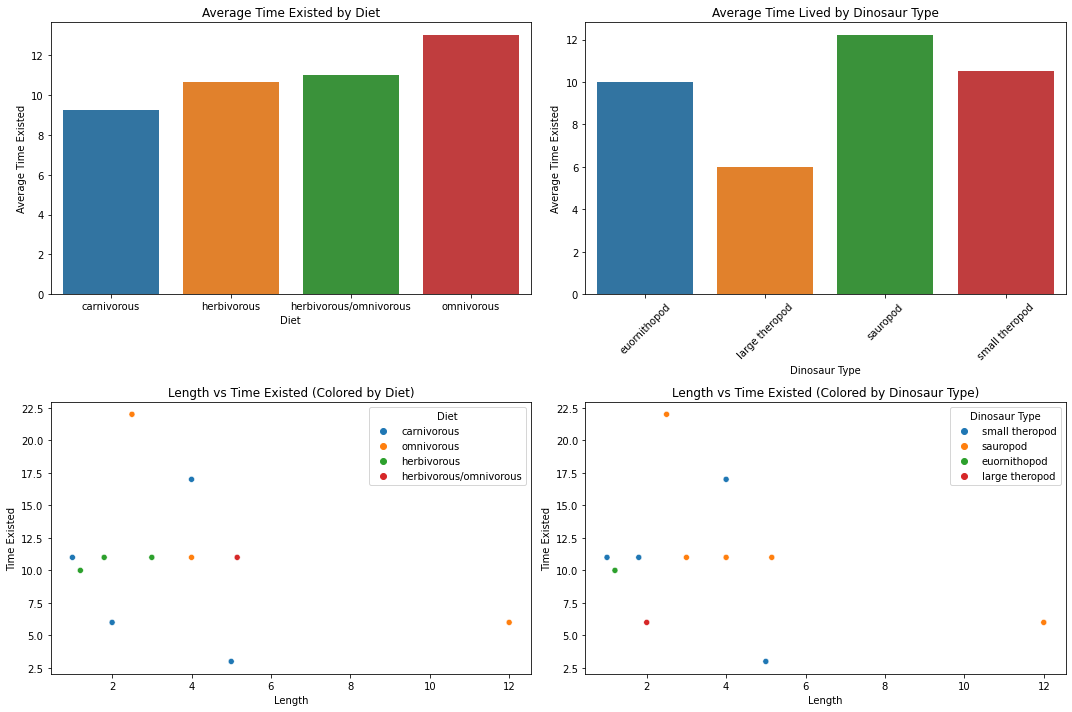

In [130]:
# Generate plots of how feature variablees relate to location
generate_plots_period(triassic)

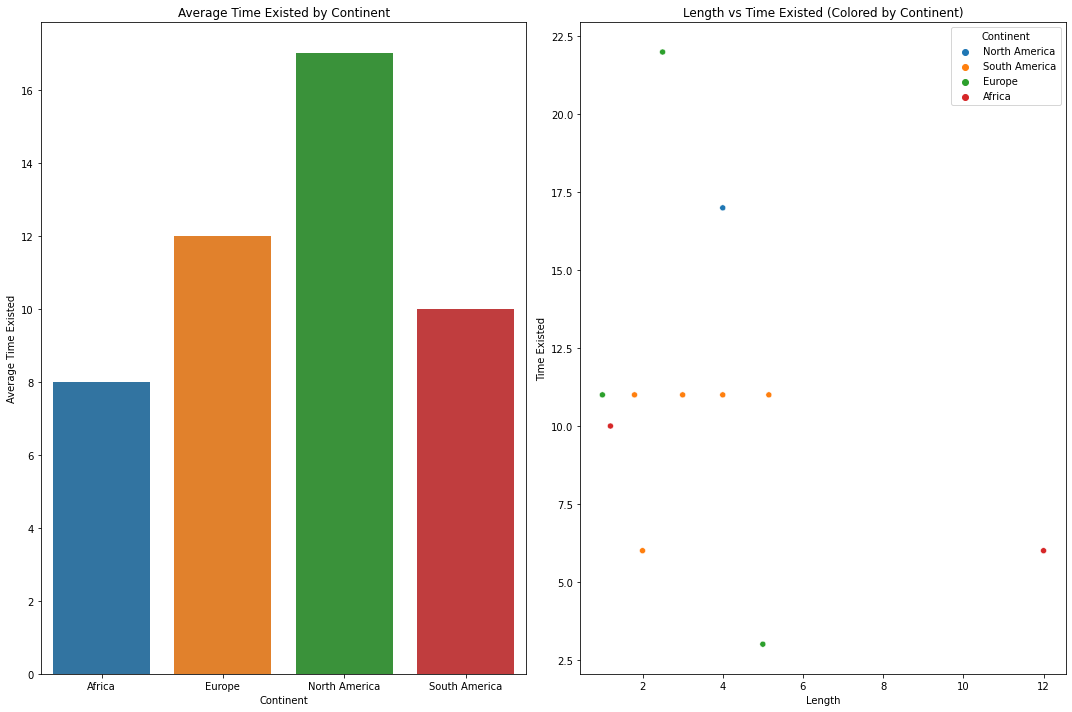

In [131]:
generate_plots_location(triassic)

### Jurassic Period

In [ ]:
# Filter to only Triassic dinosaurs
jurassic = jurassic_cleaned[(jurassic_cleaned['time_period'] == 'Jurassic')]
len(jurassic)

In [ ]:
generate_plots_period(jurassic)

In [ ]:
generate_plots_location(jurassic)

### Cretaceous Period

In [ ]:
# Filter to only Cretaceous dinosaurs
cretaceous = jurassic_cleaned[(jurassic_cleaned['time_period'] == 'Cretaceous')]
len(cretaceous)

In [ ]:
generate_plots_period(cretaceous)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

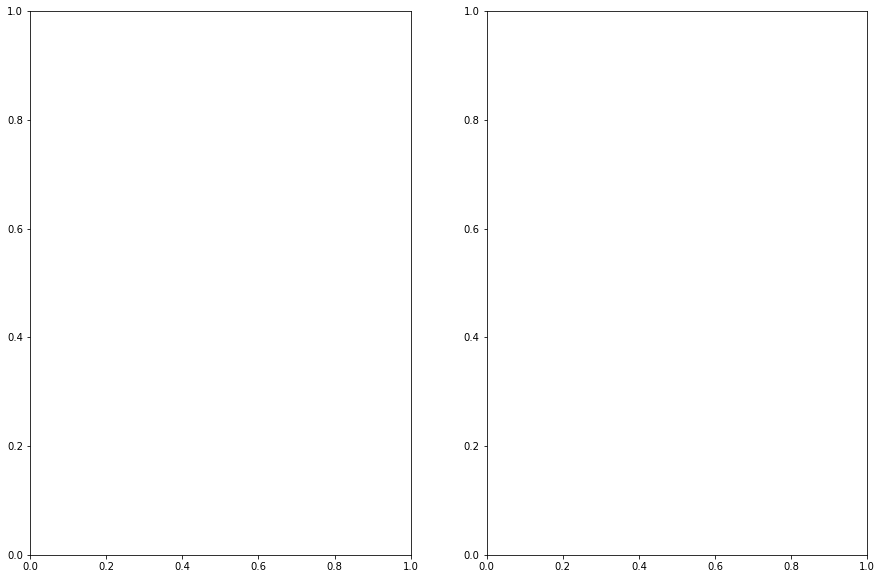

In [120]:
generate_plots_location(cretaceous)

## Statistical Analysis and Modeling

In [121]:
def get_feat_importance(df):
    """Returns feature importance to time span in coefficients, given a dataframe"""
    X = df[['diet', 'type', 'length', 'legs']]  # Feature variables
    y = df['time_span']
    
    categorical_feat = ['diet', 'type']
    numerical_feat = ['length', 'legs']
    
    # Create pipeline for preprocessing
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_feat)],
        remainder='passthrough'
    )
    
    # Append the regression model to the preprocessing steps
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])
    
    # Fit the model
    model.fit(X, y)
    
    # Extract feature names after one-hot encoding
    encoded_feature_names = preprocessor.transformers_[0][1] \
                                .named_steps['onehot'] \
                                .get_feature_names(categorical_feat)
    
    # Combine numerical and one-hot encoded categorical feature names
    all_feature_names = list(encoded_feature_names) + numerical_feat
    
    # Get coefficients of the features
    coefficients = model.named_steps['regressor'].coef_
    
    # Pair feature names with coefficients
    feature_importance = pd.Series(coefficients, index=all_feature_names)
    
    return feature_importance

### Triassic Period

In [122]:
get_feat_importance(triassic)

diet_carnivorous              -1.232180
diet_herbivorous              -2.552546
diet_herbivorous/omnivorous    0.233619
diet_omnivorous                3.551107
type_euornithopod              0.574874
type_large theropod           -3.708779
type_sauropod                  0.781495
type_small theropod            2.352409
length                        -1.295890
legs                           1.562991
dtype: float64

**Interpretation**: 

- Among dietary categories, a higher prevalence of omnivorous diets emerges as highly influential, positively impacting the predicted outcome. Conversely, the predominance of herbivorous and carnivorous diets exerts substantial negative effects on predictions, suggesting that perhaps having a more diverse diet was advantageous during this time period. 
- Among dinosaur types, small theropods demonstrate significant positive importance while large theropods exhibit a negative impact. Sauropods moderately enhance predictions, whereas Euornithopods have a more modest positive influence. 
- Longer lengths generallly seem to decrease the time span of dinosaurs while an increased number of legs used to walk generally increase the time span.

In [102]:
triassic["omnivorous"] = triassic['diet'] == "omnivirous"
triassic["small_theropod"] = triassic["type"] == "small theropod"
triassic["num_length"] = triassic["length"] < np.median(triassic["length"])
triassic["num_legs"] = triassic["legs"] > np.median(triassic["legs"])

triassic["score"] = triassic[["omnivorous", "small_theropod", "num_length", "num_legs"]].sum(axis=1)

In [115]:
triassic.sort_values(by=['score', 'time_span'], ascending=False).head()

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,time_period,time_span,continent,legs,omnivorous,small_theropod,num_length,num_legs,score
280,thecodontosaurus,omnivorous,Late Triassic 227-205 million years ago,United Kingdom,sauropod,2.5,Dinosauria Saurischia Sauropodomorpha Prosauro...,Morris (1843),antiquus,https://www.nhm.ac.uk/discover/dino-directory/...,Triassic,22.0,Europe,4,False,False,True,True,2
122,guaibasaurus,herbivorous,Late Triassic 221-210 million years ago,Brazil,small theropod,1.8,Dinosauria Saurischia Theropoda,Bonaparte Ferigolo and Ribeiro (1999),candelariensis,https://www.nhm.ac.uk/discover/dino-directory/...,Triassic,11.0,South America,2,False,True,True,False,2
226,procompsognathus,carnivorous,Late Triassic 221-210 million years ago,Germany,small theropod,1.0,Dinosauria Saurischia Theropoda Neotheropoda C...,Fraas (1913),triassicus,https://www.nhm.ac.uk/discover/dino-directory/...,Triassic,11.0,Europe,2,False,True,True,False,2
63,chindesaurus,carnivorous,Late Triassic 227-210 million years ago,USA,small theropod,4.0,Dinosauria Saurischia Theropoda Herrerasauridae,Long and Murry (1995),bryansmalli,https://www.nhm.ac.uk/discover/dino-directory/...,Triassic,17.0,North America,2,False,True,False,False,1
71,coloradisaurus,omnivorous,Late Triassic 221-210 million years ago,Argentina,sauropod,4.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Bonaparte (1978),brevis,https://www.nhm.ac.uk/discover/dino-directory/...,Triassic,11.0,South America,4,False,False,False,True,1


### Jurassic Period

In [104]:
get_feat_importance(jurassic)

diet_carnivorous         -2.112940
diet_herbivorous          2.051333
diet_omnivorous           0.061607
type_armoured dinosaur   -3.151778
type_ceratopsian         -3.179682
type_euornithopod        -0.878451
type_large theropod       3.127961
type_sauropod             2.395954
type_small theropod       1.685995
length                   -0.019749
legs                     -1.567455
dtype: float64

**Interpretation** : 

- A higher prevalence of herbivorous diets emerges as a significant positive contributor, suggesting its advantageous role in shaping predicted outcomes. Conversely, the presence of carnivorous diets exerts a substantial negative impact, potentially indicating a less favorable influence during this time period. 
- Among dinosaur types, notable patterns emerge with small theropods demonstrating a significant positive importance, whereas armoured dinosaurs and ceratopsians exhibit substantial negative impacts. Sauropods and large theropods both contribute positively to predictions, albeit to varying degrees.
- The length of dinosaurs shows a minor negative influence on predicted outcomes, suggesting that longer lengths may have shortened the time span of dinosaurs.
- The number of legs used for locomotion demonstrates a negative impact, implying a potential link between locomotive efficiency and the time span of dinosaurs. 


In [105]:
jurassic["herbivorous"] = jurassic['diet'] == "herbivorous"
jurassic["large_theropod"] = jurassic["type"] == "large theropod"
jurassic["num_length"] = jurassic["length"] < np.median(jurassic["length"])
jurassic["num_legs"] = jurassic["legs"] < np.median(jurassic["legs"])

jurassic["score"] = jurassic[["herbivorous", "large_theropod", "num_length", "num_legs"]].sum(axis=1)

In [114]:
jurassic.sort_values(by=['score', 'time_span'], ascending=False).head(10)

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,time_period,time_span,continent,legs,herbivorous,large_theropod,num_length,num_legs,score
45,bellusaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,5.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Dong and Azuma (1990),sui,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,21.0,Asia,4,True,False,True,False,2
181,monolophosaurus,carnivorous,Mid Jurassic 180-159 million years ago,China,large theropod,5.7,Dinosauria Saurischia Theropoda Neotheropoda T...,Zhao and Currie (1993),jiangi,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,21.0,Asia,2,False,True,True,False,2
67,chungkingosaurus,herbivorous,Late Jurassic 159-142 million years ago,China,armoured dinosaur,4.0,Dinosauria Ornithischia Genasauria Thyreophora...,Dong Zhou and Zhang (1983),jiangbeiensis,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,17.0,Asia,2,True,False,True,False,2
16,ammosaurus,herbivorous,Early Jurassic 195-180 million years ago,USA,sauropod,5.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Marsh (1891),major,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,15.0,North America,4,True,False,True,False,2
88,dryosaurus,herbivorous,Late Jurassic 155-140 million years ago,USA,euornithopod,4.0,Dinosauria Ornithischia Genasauria Cerapoda Or...,Marsh (1894),altus,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,15.0,North America,2,True,False,True,False,2
143,jingshanosaurus,herbivorous,Early Jurassic 205-190 million years ago,China,sauropod,5.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Zhang and Yang (1995),xinwaensis,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,15.0,Asia,4,True,False,True,False,2
247,scelidosaurus,herbivorous,Early Jurassic 208-194 million years ago,United Kingdom,armoured dinosaur,4.0,Dinosauria Ornithischia Genasauria Thyreophora...,Owen (1868),harrisonii,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,14.0,Europe,2,True,False,True,False,2
109,gargoyleosaurus,herbivorous,Late Jurassic 154-142 million years ago,USA,armoured dinosaur,4.0,Dinosauria Ornithischia Genasauria Thyreophora...,Carpenter Miles and Cloward (1998),parkpinorum,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,12.0,North America,2,True,False,True,False,2
129,hesperosaurus,herbivorous,Late Jurassic 154-142 million years ago,USA,armoured dinosaur,6.0,Dinosauria Ornithischia Genasauria Thyreophora...,Carpenter Miles and Cloward (2001),mjosi,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,12.0,North America,2,True,False,True,False,2
170,marshosaurus,carnivorous,Late Jurassic 154-142 million years ago,USA,large theropod,6.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Madsen (1976),bicentesimus,https://www.nhm.ac.uk/discover/dino-directory/...,Jurassic,12.0,North America,2,False,True,True,False,2


### Cretaceous Period

In [107]:
get_feat_importance(cretaceous)

diet_carnivorous          0.681796
diet_herbivorous         -3.743037
diet_omnivorous          -1.785925
diet_unknown              4.847166
type_armoured dinosaur    3.280136
type_ceratopsian         -1.941635
type_euornithopod         1.792917
type_large theropod      -1.925632
type_sauropod             2.349343
type_small theropod      -3.555130
length                   -0.039294
legs                      0.815417
dtype: float64

**Interpretation** : 

- A higher prevalence of herbivorous diets emerges as a substantial negative influencer, suggesting its potentially adverse impact on predicted outcomes.
- Among dinosaur types, armoured dinosaurs exhibit a significant positive importance, while small theropods demonstrate a considerable negative impact. Sauropods and large theropods both contribute positively to predictions, though to differing extents.
- The length of specimens shows a minor negative influence on predicted outcomes, hinting at a potential association between longer lengths and shorter time spans for dinosaurs.
- The number of legs utilized for locomotion presents a moderate positive impact, suggesting a potential link between locomotive efficiency and certain aspects of predicted outcomes.

In [108]:
cretaceous["carnivorous"] = cretaceous['diet'] == "carnivorous"
cretaceous["armoured_dinosaur"] = cretaceous["type"] == "armoured dinosaur "
cretaceous["num_length"] = cretaceous["length"] < np.median(cretaceous["length"])
cretaceous["num_legs"] = cretaceous["legs"] > np.median(cretaceous["legs"])

cretaceous["score"] = cretaceous[["carnivorous", "armoured_dinosaur", "num_length", "num_legs"]].sum(axis=1)

In [113]:
cretaceous.sort_values(by=['score', 'time_span'], ascending=False).head()

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link,time_period,time_span,continent,legs,carnivorous,armoured_dinosaur,num_length,num_legs,score
29,archaeornithomimus,carnivorous,Late Cretaceous 95-70 million years ago,Uzbekistan,small theropod,3.5,Dinosauria Saurischia Theropoda Neotheropoda T...,Russell (1972),asiaticus,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,25.0,Asia,2,True,False,True,False,2
27,archaeoceratops,herbivorous,Early Cretaceous 121-99 million years ago,China,ceratopsian,1.3,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Dong and Azuma (1987),oshimai,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,22.0,Asia,4,False,False,True,True,2
106,fukuiraptor,carnivorous,Early Cretaceous 121-99 million years ago,Japan,large theropod,4.2,Dinosauria Saurischia Theropoda Neotheropoda T...,Azuma and Currie (2000),kitadaniensis,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,22.0,Asia,2,True,False,True,False,2
11,alectrosaurus,carnivorous,Late Cretaceous 90-70 million years ago,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Gilmore (1933),olseni,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,20.0,Asia,2,True,False,True,False,2
177,microceratus,herbivorous,Late Cretaceous 86-66 million years ago,Mongolia,ceratopsian,0.5,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Bohlin (1953),gobiensis,https://www.nhm.ac.uk/discover/dino-directory/...,Cretaceous,20.0,Asia,4,False,False,True,True,2
